In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [12]:
dataset = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Github\005_Machine_Learning_Github\Machine_Learning_Fundamentals\010_Supervised_machine_learning\002_Classification_Learning\Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


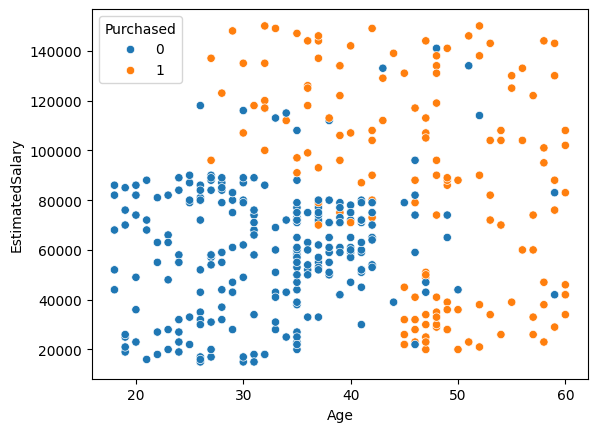

In [52]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", data = dataset, hue="Purchased")
plt.show()

In [15]:
#  Check the NUll Value..
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
x = dataset.iloc[:, : -1]
y = dataset["Purchased"]
# x,y

In [18]:
#  we have the age and the and there is a huge difference between them so we need to scaling these things..
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
sc.fit(x)
# sc.transform(x)

#  we create the new dataframe after the scaling of the columns..
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Required Library for the Decision Tree...
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# Using with the Entropy..
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [50]:
# dt.score(x_test, y_test) * 100
dt1.score(x_test, y_test) * 100

83.75

In [42]:
# Predict the accuracy for the Decision Tree Model..
dt.predict([[35, 20000]])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


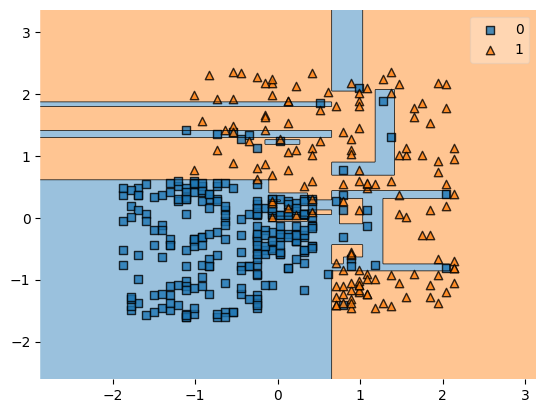

In [58]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt1)
plt.show()

In [43]:
# For Visual Representation of the Decision Tree..
from sklearn.tree import plot_tree

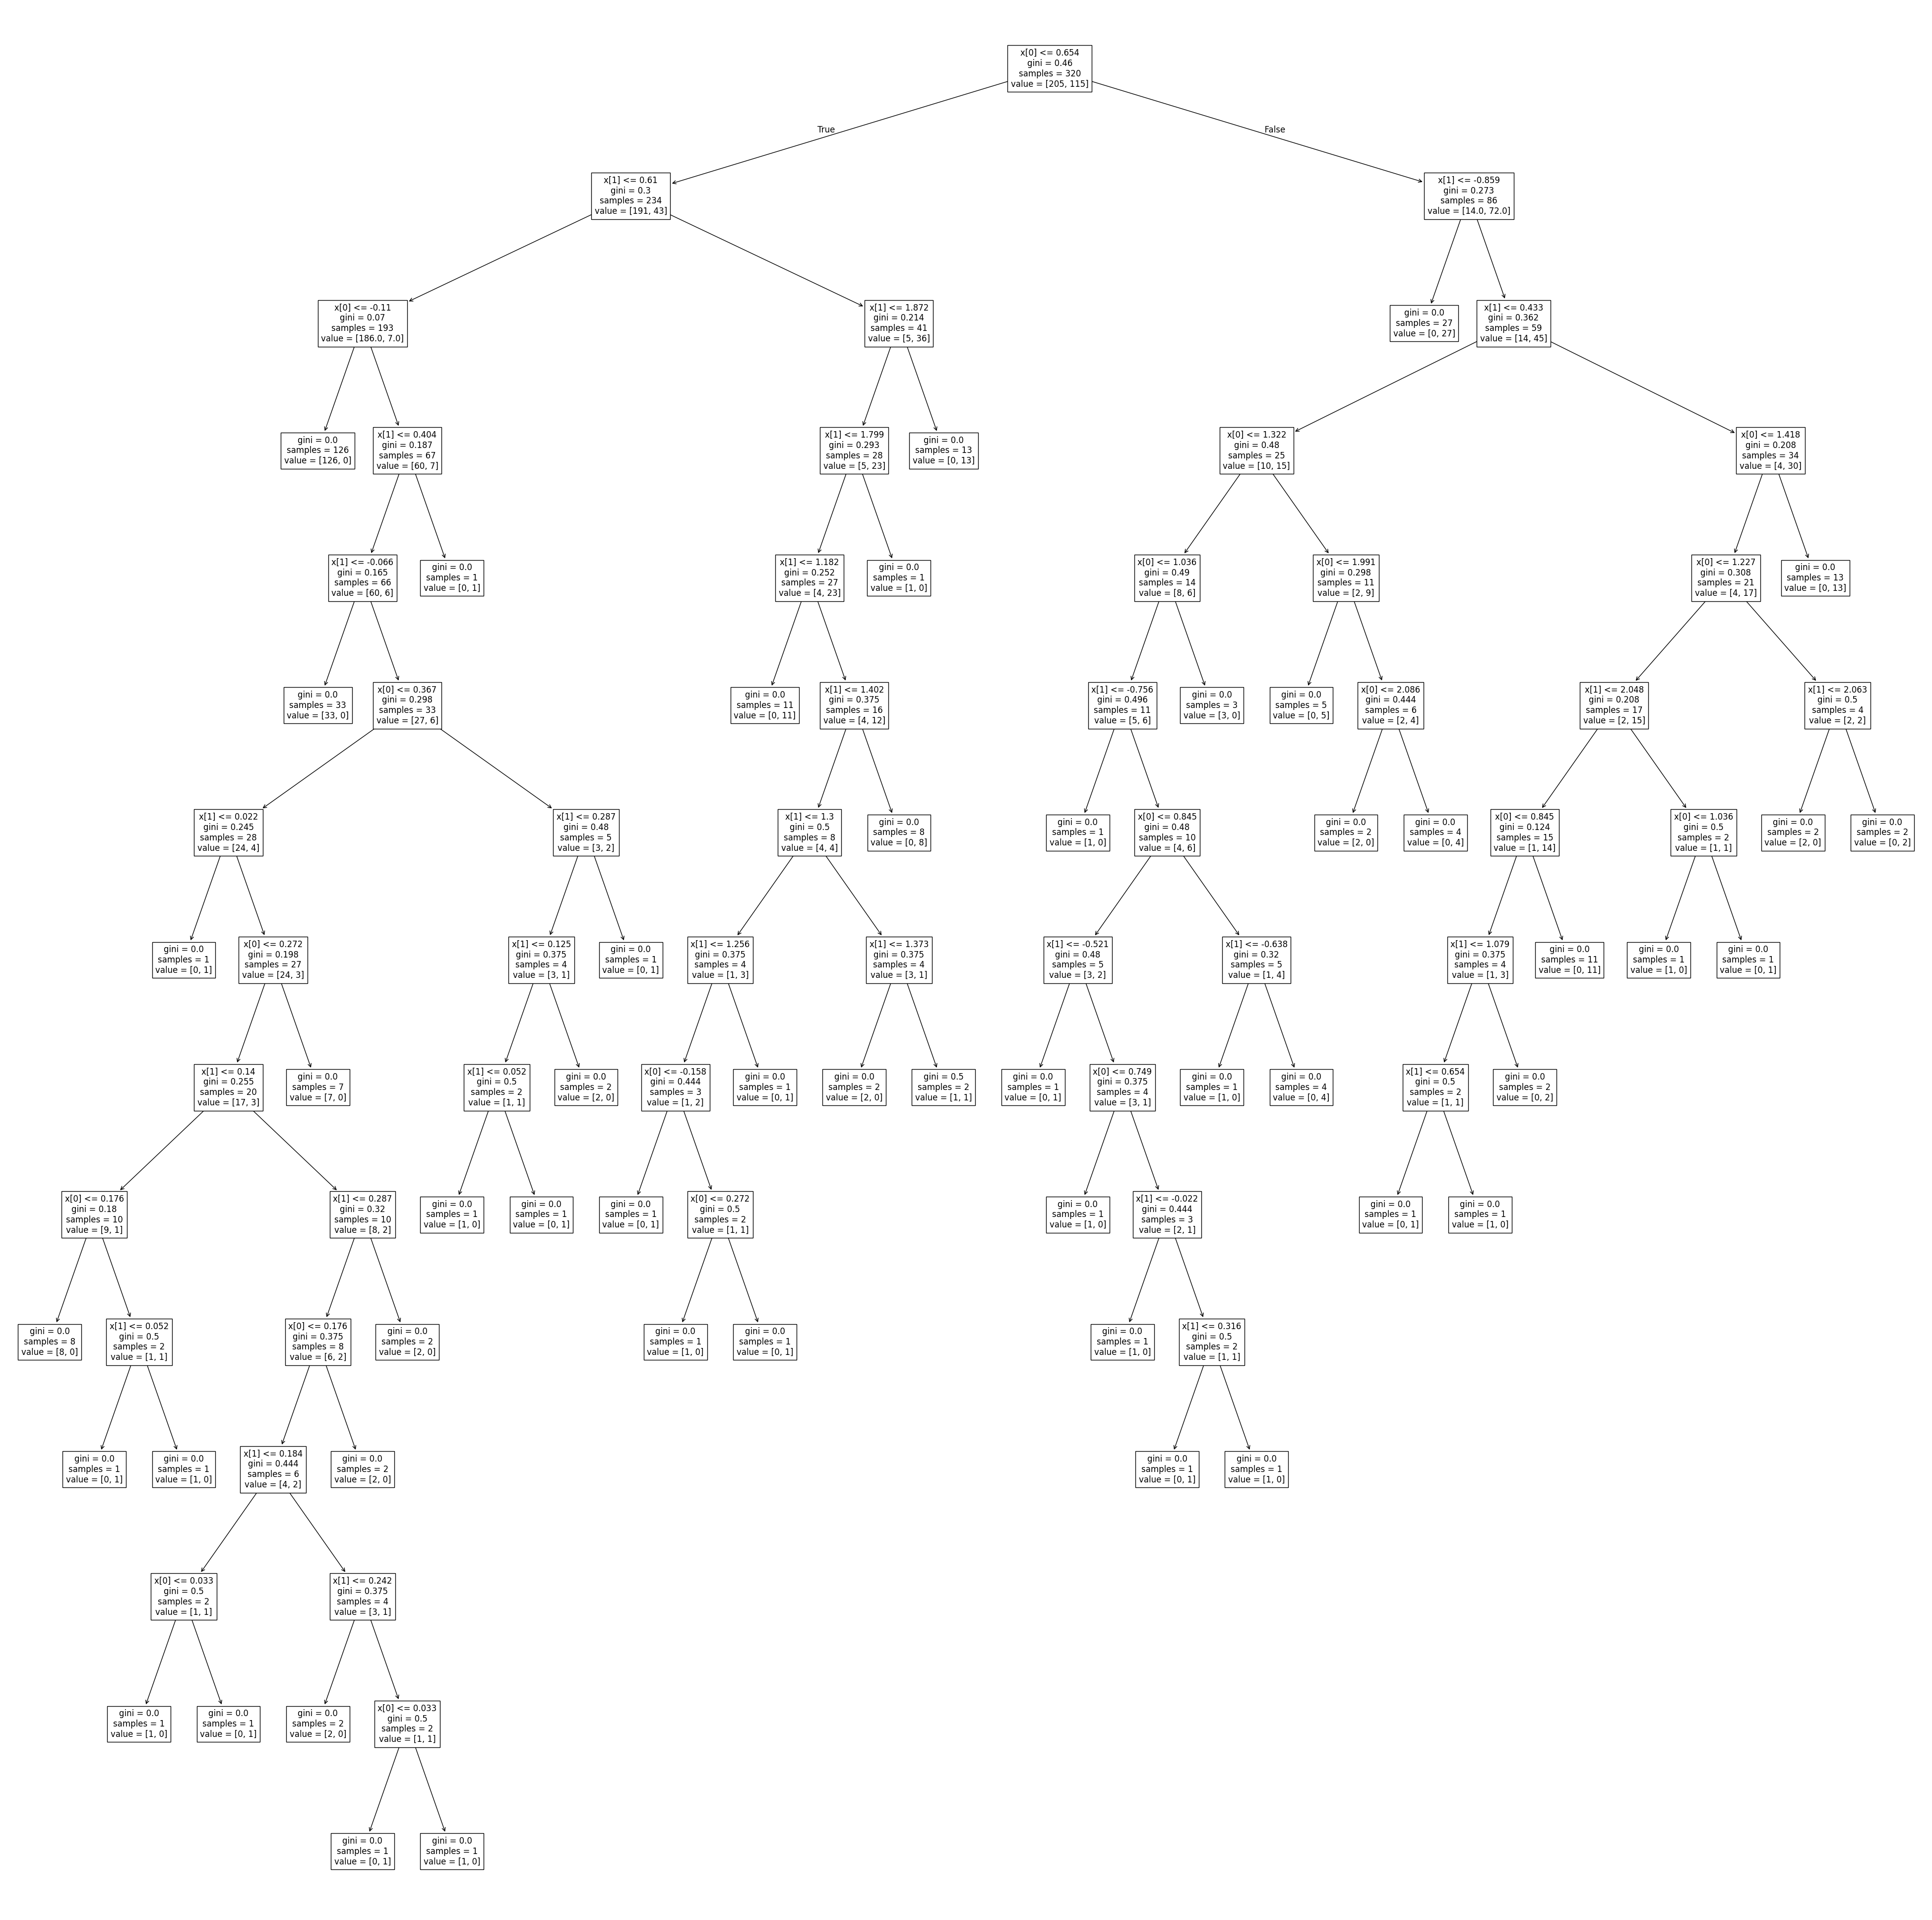

In [59]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

Accuracy: 100.00%


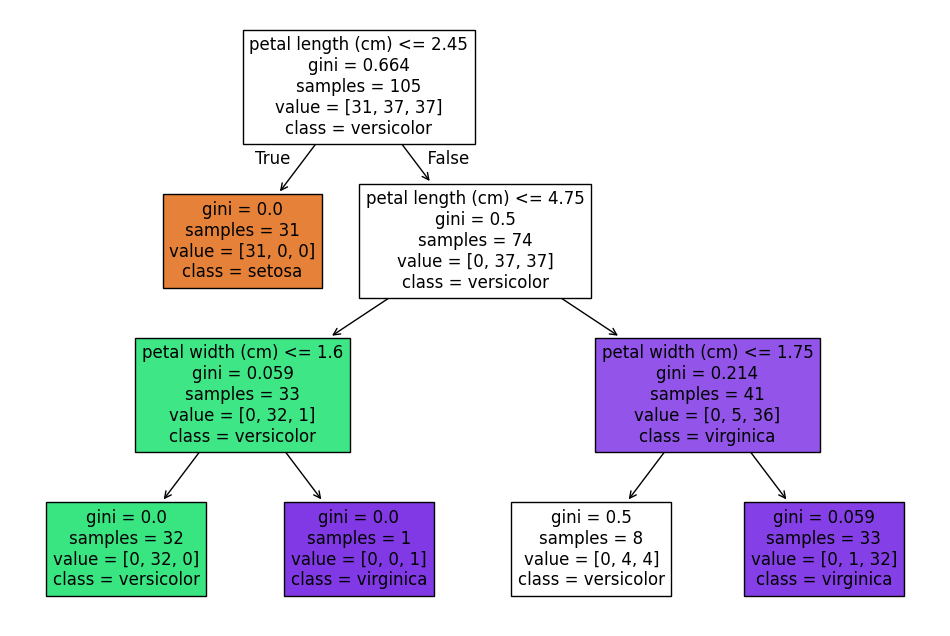

In [60]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree model (using Gini Index as the criterion)
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
